# Importing Libraries

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json
import re 
from random import shuffle
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Reading Dataset

In [6]:
video_dataset = pd.read_csv('USvideos.csv')

In [7]:
all_categories = {
    "1":"Film & Animation",
    "2":"Autos & Vehicles",
    "10":"Music",
    "15":"Pets & Animals",
    "17":"Sports",
    "18":"Short Movies",
    "19":"Travel & Events",
    "20":"Gaming",
    "21":"Videoblogging",
    "22":"People & Blogs",
    "23":"Comedy",
    "24":"Entertainment",
    "25":"News & Politics",
    "26":"How to & Style",
    "27":"Education",
    "28":"Science & Technology",
    "29":"Nonprofits & Activism",
    "30":"Movies",
    "31":"Anime/Animation",
    "32":"Action/Adventure",
    "33":"Classics",
    "34":"Comedy",
    "35":"Documentary",
    "36":"Drama",
    "37":"Family",
    "38":"Foreign",
    "39":"Horror",
    "40":"Sci-Fi/Fantasy",
    "41":"Thriller",
    "42":"Shorts",
    "43":"Shows",
    "44":"Trailers"
  }

## Preparing Dataset

In [8]:
video_dataset["cateogory_name"] = ""
 
for index, row in tqdm(video_dataset.iterrows(), total=video_dataset.shape[0]):
    cat_id = row['category_id']
    cat_name = all_categories[str(cat_id)]
    video_dataset.at[index,'cateogory_name'] = cat_name

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40949/40949 [00:07<00:00, 5580.99it/s]


In [9]:
relevant_columns = ["video_id", "title", "description", "category_id","cateogory_name"]
video_dataset = video_dataset[relevant_columns]

In [10]:
RANDOM_SEED = 40
df_train, df_test = train_test_split(video_dataset, 
                                     test_size=0.2, 
                                     random_state=RANDOM_SEED)

## Few Shot Learning with SetFit

In [11]:
from setfit import SetFitClassifier

In [12]:
# takes a sentence-transformers model
clf = SetFitClassifier("paraphrase-MiniLM-L3-v2")

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [13]:
docs = df_train['title'].to_list()
labels = df_train['cateogory_name'].to_list()

# Model Training

In [14]:
clf.fit(docs, labels)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/20475 [00:00<?, ?it/s]

# Model Testing

In [15]:
df_test['predicted'] = clf.predict(df_test['title'].to_list())

# Metrics

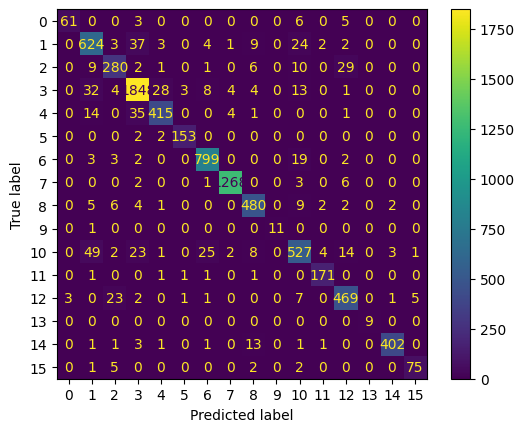

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(df_test['cateogory_name'],
                      df_test['predicted'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(df_test["cateogory_name"], 
                            df_test["predicted"]))

                       precision    recall  f1-score   support

     Autos & Vehicles       0.95      0.81      0.88        75
               Comedy       0.84      0.88      0.86       709
            Education       0.86      0.83      0.84       338
        Entertainment       0.94      0.95      0.95      1945
     Film & Animation       0.92      0.88      0.90       470
               Gaming       0.97      0.97      0.97       157
       How to & Style       0.95      0.96      0.96       828
                Music       0.99      0.99      0.99      1280
      News & Politics       0.92      0.94      0.93       511
Nonprofits & Activism       1.00      0.92      0.96        12
       People & Blogs       0.85      0.80      0.82       659
       Pets & Animals       0.95      0.97      0.96       176
 Science & Technology       0.88      0.92      0.90       512
                Shows       1.00      1.00      1.00         9
               Sports       0.99      0.95      0.97  

In [19]:
import pickle

Pkl_Filename = "Few_Shot_Classifer_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf, file)